Hello!!

In this analysis i'll use a game database from IGN and try to predict if the game score.

For making this prediction I'll be using a random forest - Regression algorithm with the sklearn library.

I'll start with a exploratory Analysis and then proceed to the regression and estimation of values.

What is Random Forest Regression?

Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.

1. IMPORTING LIBRARIES

In [12]:
##Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import tree

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

2. DEFINING MAIN DATABASE

In [13]:
##Here I'll import my main dataset

df =  pd.read_csv('ign.csv',encoding='utf-8', sep=',', header=0)

df = df.drop('Unnamed: 0', axis='columns')

display(df.head())

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


3. EXPLORATORY ANALYSIS

Here i'll try to gain some insight into the data.

First of all ill make some distribution plots in order to better understand how our data is scattered in the main collumns.


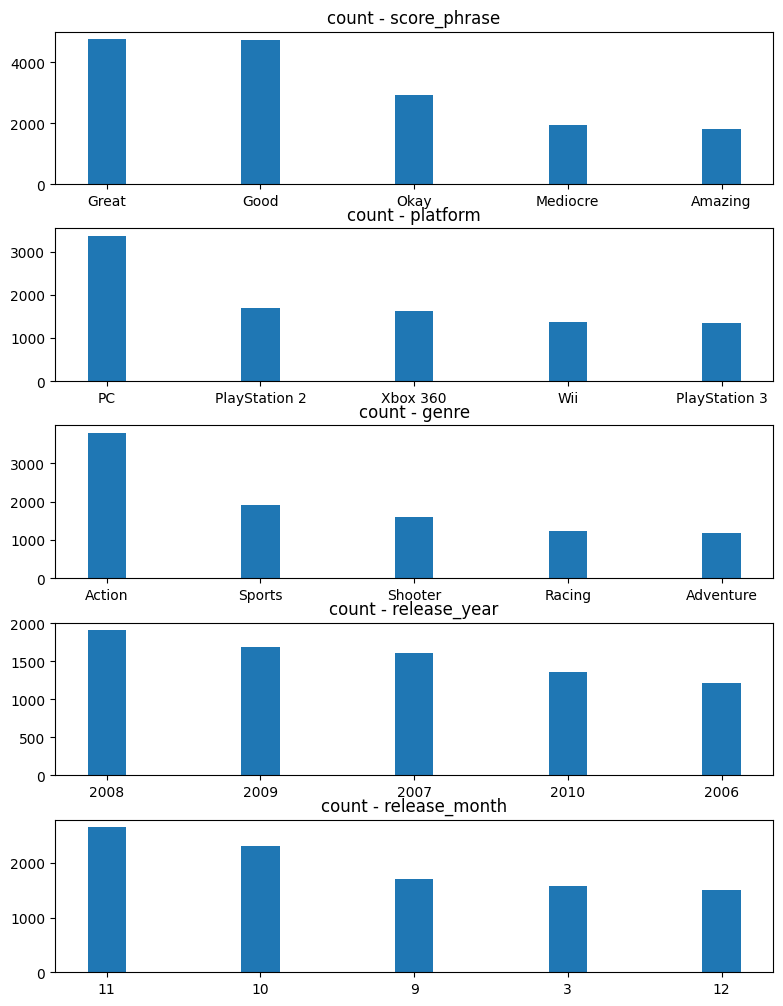

In [14]:
##First of all i'll make some distribution plots in order to better understand how our data is scattered in the main collumns.

print('First of all i''ll make some distribution plots in order to better understand how our data is scattered in the main collumns.')

col_names = ['score_phrase', 'platform', 'genre', 'release_year', 'release_month']

n = len(col_names)
fig, ax = plt.subplots(n,1,figsize=(8,2*n))
fig.tight_layout()
width = 0.5
cont = 0

for col in col_names:
    
    count_list = df[col].value_counts().tolist()[:5]
    keys_list =  df[col].value_counts().keys().tolist()[:5]

    
    x = np.arange(len(count_list))
    
    ax[cont].bar(x, count_list, width/2)
    ax[cont].set_xticks(x,keys_list , rotation ='horizontal')
    ax[cont].set_title('count - '+col)

    cont = cont+1

Here we can see that we have unneven distributions for each category with many entries. We can also observe the top registers on each category.

Many of these categories is not continuous numbers, so we'll need to convert them to numerical values, so we can use them in our analysis.

4. PREPARING DATA

Now we'll prepare the test and train datasets in order to use them into our regression model.

In [15]:
## Defining dependent and independent variables

##first of all let's drop the columns we'll not use in the analysis

x = df.drop(['score','title','url'], axis = 1) # Features
y = df['score']  # Target

In [16]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [17]:
# Ok, now let's encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['score_phrase', 'platform', 'genre', 'editors_choice'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)


print('Below we can see a part of the test dataset:')

display(x_test.head())

Below we can see a part of the test dataset:


,score_phrase,platform,genre,editors_choice,release_year,release_month,release_day
12680,7,15.0,27.0,1,2009,3,18
7698,2,5.0,11.0,1,2006,2,15
10054,5,15.0,8.0,1,2007,10,30
2153,8,20.0,4.0,1,2000,5,25
7252,2,14.0,23.0,1,2005,10,28


5. TRAINING AND RUNNING MODEL

With our dataset ready, we can make our model fit and take some metrics from it in order to measure its eficiency.

In [18]:
# Initializing the Random Forest Regression model with 30 decision trees
model = RandomForestRegressor(n_estimators = 100)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

print('Now we have our model ready for the predictions.')


Now we have our model ready for the predictions.


Now let's use our test base to make some predictions!!

We'll use these predictions to compare with the y_test later, so we can get our metrics and see how our model is performing.

In [19]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
##I'll use this measure to have a measure of precision for our predictions

print('Now that we have our model trained and made some predictions, let''s take the mean square root error, so we can measure how precise our model is.')
print('\nThis measure is a representation of the average error across all dataset, considering all the measures in the test set.') 
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

print('\nWe can also compare our RMSE to the mean value of our target. A good measure is that this fraction, when lower than 5%, means that the model is quite good at estimating the desired values.')
print("\nRMSE/(Mean Score Value): ", round(rmse*100/y_test.mean(),2),'%')

print('\nWe can see here that our fraction represents a good measure.')


Now that we have our model trained and made some predictions, lets take the mean square root error, so we can measure how precise our model is.

This measure is a representation of the average error across all dataset, considering all the measures in the test set.

RMSE:  0.276

We can also compare our RMSE to the mean value of our target. A good measure is that this fraction, when lower than 5%, means that the model is quite good at estimating the desired values.

RMSE/(Mean Score Value):  3.99 %

We can see here that our fraction represents a good measure.


6. POST PROCESSING

With our model up and running, we can make some post-processing analysis to gain more insight into the data and the model's capabilities.

First I'll apply the trained model in all the entries in the dataset and then compare the prediction with the real values.

Here we have a final table with all the original entries plus the prediction values and the difference to the reference (%).



,title,score,predicted,Error Percentage
0,LittleBigPlanet PS Vita,9.0,8.24600,8.377778
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0,8.24600,8.377778
2,Splice: Tree of Life,8.5,8.51100,0.129412
3,NHL 13,8.5,8.50700,0.082353
4,NHL 13,8.5,8.49800,0.023529
...,...,...,...,...
18620,Tokyo Mirage Sessions #FE,7.6,9.16250,20.559211
18621,LEGO Star Wars: The Force Awakens,9.0,8.40575,6.602778
18622,Star Ocean: Integrity and Faithlessness,5.8,5.43900,6.224138
18623,Inside,10.0,5.88900,41.110000


Il also include a distribution plot se we can see where the majority of the values is located.



(0.0, 100.0)

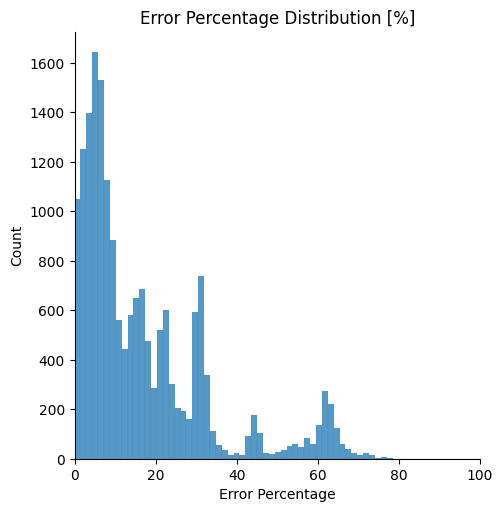

In [20]:
##First, let's encode and run our model again


x = encoder.fit_transform(x)

y_pred2 = model.predict(x)

##Now let's append the prediction column into our dataframe and calculate the difference between prediction and actual value (%)



df_test=df[['title','score']]
df_test['predicted'] = y_pred2
df_test['Error Percentage'] = abs((df_test['score'] - df_test['predicted'])*100/df_test['score'])

print('Here we have a final table with all the original entries plus the prediction values and the difference to the reference (%).\n')
display(df_test)

print('I''l also include a distribution plot se we can see where the majority of the values is located.\n')

sns.displot(df_test['Error Percentage'])
plt.title('Error Percentage Distribution [%]')
plt.xlim(0, 100)






Here I'd also like to get some proportion about the % error, so let's classify the entries into bins and display them.

Once Ive grouped the results per bin, I can display then into a donut plot, so we can have a better understanding about the error range in our dataset predictions:

We can see that 47.15 % of the values has had less than 10% in prediction error compared to the original value.


Text(0.5, 1.0, 'Error Distribution [%]')

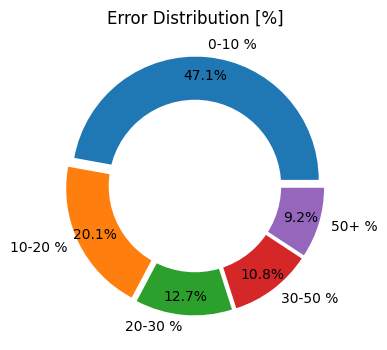

In [23]:
##Here I'll make a SQL query to classify the results into bins and count the values per bin

error_bin_df = sqldf(''' select 
                        case when abs(score-predicted)*100/score < 10 then '0-10 %'
                        when abs(score-predicted)*100/score < 20 then '10-20 %'
                        when abs(score-predicted)*100/score < 30 then '20-30 %'
                        when abs(score-predicted)*100/score < 50 then '30-50 %' else '50+ %' end as error_bin_label
                     
                     , count('Error Percentage') as count from df_test group by  error_bin_label order by error_bin_label asc ''')



print('Once I''ve grouped the results per bin, I can display then into a donut plot, so we can have a better understanding about the error range in our dataset predictions:\n')

print('We can see that',round(error_bin_df['count'][0]*100/sum(error_bin_df['count']),2),'% of the values has had less than 10% in prediction error compared to the original value.')

fig, ax = plt.subplots(1,1,figsize=(8,4))

##creates explode array 

my_explode = [0.05]*len(error_bin_df['count'])


##creates pie chart
ax.pie(error_bin_df['count'],  labels=error_bin_df['error_bin_label'],autopct='%1.1f%%', pctdistance=0.85,  explode=my_explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1 = plt.gcf()

# Adding Circle in Pie chart
fig1.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Error Distribution [%]')







7. RE-ENGINEERING

At this point our analysis is complete. If our model was not satisfactory we could look at the feature importance in our model, in order to drop the least important features and optimize our random forest regression.

We could also change the number of decision trees used in each forest, but that would come at the cost of heavier computational cost.

Now, for the sake of curiosity, I'll display the feature importance for this model in a viz.

Lets plot our feature scores so we can see the ones that have the most influence in our model.

We can see that our most important features are score_phrase and editors_choice as is listed below.



score_phrase      0.893292
editors_choice    0.076953
release_day       0.007438
genre             0.005806
release_year      0.005723
platform          0.005723
release_month     0.005065
dtype: float64



We can also add a viz to better understand the data.



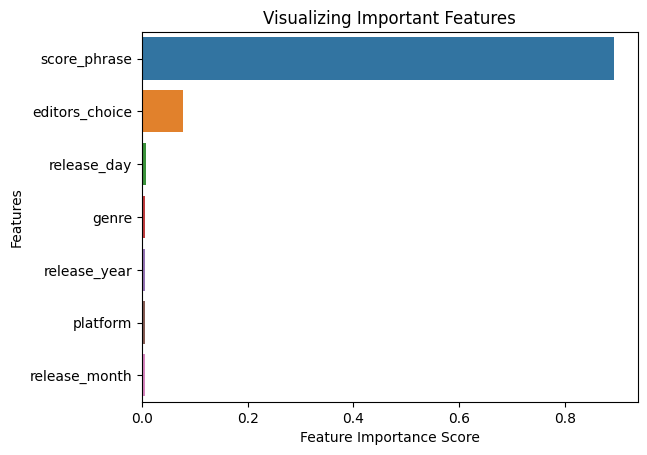

In [22]:
##First of all, let's display our feature importance classification for the 100 tree model

feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)


print('Let''s plot our feature scores so we can see the ones that have the most influence in our model.\n')
print('We can see that our most important features are',feature_scores.index[0],'and',feature_scores.index[1],'as is listed below.\n')
display(feature_scores)

print('\n\nWe can also add a viz to better understand the data.\n')

##We can also create a visualization in order to better see the info

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()